This notebook generates the images used in the documentation

In [1]:
%matplotlib inline

import sys
sys.path.insert(0, '../../' )
import SchemDraw as schem
import SchemDraw.elements as e
import SchemDraw.logic as l

In [2]:
def drawElements(elm_list, n=5, dx=1, dy=2, ofst=.8, fname=None, **kwargs):
    x = 0
    y = 0

    d = schem.Drawing(fontsize=12)
    for elm in elm_list:
        A = d.add(elm, xy=[(d.unit+1)*x+1,y], label=elm['name'], **kwargs)
        x = x + dx
        if x >= n:
            x=0
            y=y-dy

    d.draw()
    if fname is not None:
        d.save(fname)

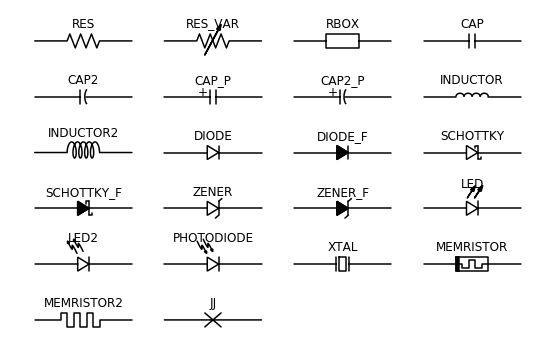

In [3]:
elements_2term = [
e.RES,
e.RES_VAR,
e.RBOX,
e.CAP,
e.CAP2,
e.CAP_P,
e.CAP2_P,
e.INDUCTOR,
e.INDUCTOR2,
e.DIODE,
e.DIODE_F,
e.SCHOTTKY,
e.SCHOTTKY_F,
e.ZENER,
e.ZENER_F,
e.LED,
e.LED2,
e.PHOTODIODE,
e.XTAL,
e.MEMRISTOR,
e.MEMRISTOR2,
e.JJ
]

drawElements(elements_2term, n=4, fname='2term.svg', lblofst=.6, lblloc='center')

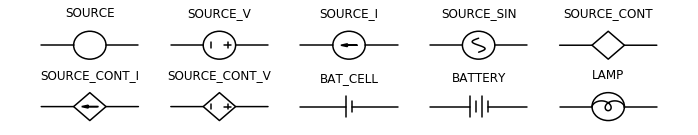

In [4]:
sources = [
e.SOURCE,
e.SOURCE_V,
e.SOURCE_I,
e.SOURCE_SIN,
e.SOURCE_CONT,
e.SOURCE_CONT_I,
e.SOURCE_CONT_V,
e.BAT_CELL,
e.BATTERY,
e.LAMP
]
drawElements(sources, n=5, dy=2.2, fname='sources.svg', d='right', lblofst=.4)

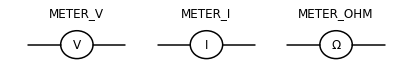

In [5]:
meters = [
e.METER_V,
e.METER_I,
e.METER_OHM
]
drawElements(meters, n=3, dy=2.2, fname='meters.svg', d='left', lblofst=.4)

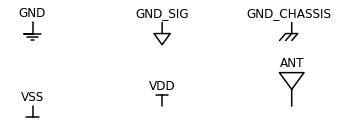

In [6]:
grounds = [
e.GND,
e.GND_SIG,
e.GND_CHASSIS,
e.VSS,
e.VDD,
e.ANT,
]
drawElements(grounds, n=3, dy=3, fname='grounds.svg')

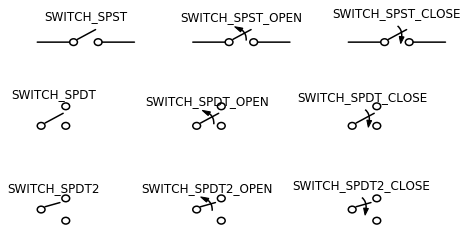

In [7]:
switches =[
e.SWITCH_SPST,
e.SWITCH_SPST_OPEN,
e.SWITCH_SPST_CLOSE,
e.SWITCH_SPDT,
e.SWITCH_SPDT_OPEN,
e.SWITCH_SPDT_CLOSE,
e.SWITCH_SPDT2,
e.SWITCH_SPDT2_OPEN,
e.SWITCH_SPDT2_CLOSE,
]
drawElements(switches, n=3, dx=1.2, dy=3, fname='switches.svg', lblloc='center', lblofst=.8)

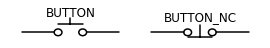

In [8]:
switches =[
e.BUTTON,
e.BUTTON_NC
]
drawElements(switches, n=3, fname='buttons.svg', lblloc='center', lblofst=.5)

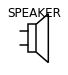

In [9]:
other =[
e.SPEAKER,
]
drawElements(other, n=3, fname='speaker.svg', lblloc='center', lblofst=.9)

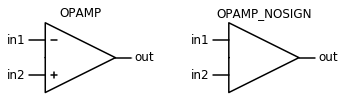

In [10]:
d = schem.Drawing(fontsize=12)
op = d.add( e.OPAMP, label='OPAMP' )
d.add(e.LINE, xy=op.in1, d='left', l=.5, lftlabel='in1')
d.add(e.LINE, xy=op.in2, d='left', l=.5, lftlabel='in2')
d.add(e.LINE, xy=op.out, d='right', l=.5, rgtlabel='out')

d.add(e.GAP_LABEL )
op2 = d.add(e.OPAMP_NOSIGN, label='OPAMP_NOSIGN' )
d.add(e.LINE, xy=op2.in1, d='left', l=.5, lftlabel='in1')
d.add(e.LINE, xy=op2.in2, d='left', l=.5, lftlabel='in2')
d.add(e.LINE, xy=op2.out, d='right', l=.5, rgtlabel='out')

d.draw()
d.save('opamp.svg')

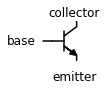

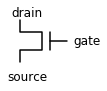

In [11]:
d = schem.Drawing(fontsize=12)
bjt = d.add(e.BJT_NPN)
d.add(e.LINE, xy=bjt.base, d='left', l=.3, lblofst=.2, lftlabel='base')
bjt.add_label('emitter', loc='center', ofst=[.3,-1.3])
bjt.add_label('collector', loc='center', ofst=[.3,1.0])
d.draw()
d.save('bjt_anchors.svg')

d = schem.Drawing(fontsize=12)
fet = d.add(e.NFET)
d.add(e.LINE, xy=fet.gate, d='right', l=0, lblofst=.2, rgtlabel='gate')
fet.add_label('source', loc='center', ofst=[-.5,-1.3])
fet.add_label('drain', loc='center', ofst=[-.5,1.0])
d.draw()
d.save('fet_anchors.svg')

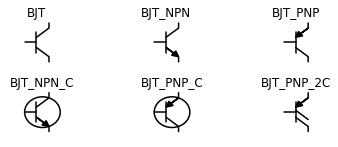

In [12]:
bjt = [
e.BJT,
e.BJT_NPN,
e.BJT_PNP,
e.BJT_NPN_C,
e.BJT_PNP_C,
e.BJT_PNP_2C
]
drawElements(bjt, n=3, dy=2.5, fname='bjt.svg', lblloc='top')


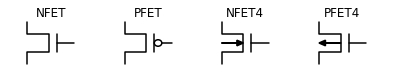

In [13]:
fet = [
e.NFET,
e.PFET
]
d = schem.Drawing(fontsize=12)
d.add(e.NFET, label='NFET', lblloc='top')
d.add(e.PFET, label='PFET', lblloc='top', xy=[3,0] )
d.add(e.NFET4, label='NFET4', lblloc='top', xy=[6,0])
d.add(e.PFET4, label='PFET4', lblloc='top', xy=[9,0])
d.draw()
d.save('fet.svg')

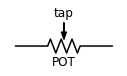

In [14]:
d = schem.Drawing(fontsize=12)
P = d.add(e.POT, botlabel='POT')
d.add(e.LINE, xy=P.tap, d='up', l=.5)
P.add_label('tap')
d.draw()
d.save('pot.svg')

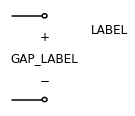

In [15]:
d = schem.Drawing(fontsize=12)
d.add(e.LINE, d='right', l=1)
d.add(e.LABEL, xy=[3,-.5], label='LABEL')
d.add(e.DOT_OPEN)
d.add(e.GAP_LABEL, d='down', label=['+','GAP_LABEL','$-$'])  # Use math mode to make it a minus, not a hyphen.
d.add(e.DOT_OPEN)
d.add(e.LINE, d='left', l=1)
d.draw()
d.save('label.svg')

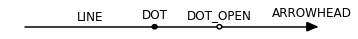

In [16]:
## Connecting elements

d = schem.Drawing(fontsize=12)
d.add(e.LINE, l=4, label='LINE')
d.add(e.DOT, label='DOT')
d.add(e.LINE, l=2)
d.add(e.DOT_OPEN, label='DOT_OPEN')
d.add(e.LINE, l=3)
d.add(e.ARROWHEAD, label='ARROWHEAD')
d.draw()
d.save('connectors.svg')

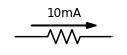

In [17]:
d = schem.Drawing(fontsize=12)
R1 = d.add(e.RES)
d.labelI(R1, '10mA')
d.add(e.GAP_LABEL, d='up', l=.5)  # To bump the margins...
d.draw()
d.save('labeli.svg')

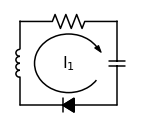

In [18]:
# Test loop current label
d = schem.Drawing()
R1 = d.add(e.RES)
C1 = d.add(e.CAP, d='down')
D1 = d.add(e.DIODE_F, d='left')
L1 = d.add(e.INDUCTOR, d='up')
d.loopI([R1, C1, D1, L1], d='cw', label='$I_1$')
d.draw()
d.save('loopi.svg')

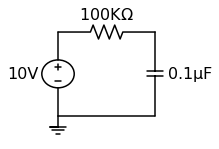

In [19]:
d = schem.Drawing()
V1 = d.add(e.SOURCE_V, label='10V')
d.add(e.RES, d='right', label='100K$\Omega$')
d.add(e.CAP, d='down', botlabel='0.1$\mu$F')
d.add(e.LINE, to=V1.start)
d.add(e.GND)
d.draw()
d.save('testschematic.svg')

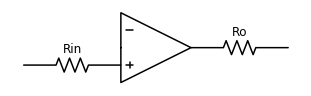

In [20]:
d = schem.Drawing(fontsize=12)
d.add(e.RES, label='Rin')
op = d.add(e.OPAMP, anchor='in2')
d.add(e.RES, xy=op.out, label='Ro')
d.draw()
d.save('opamp_anchor.svg')

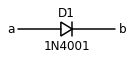

In [21]:
d = schem.Drawing(fontsize=12)
D1 = d.add(e.DIODE, label='D1')
D1.add_label('1N4001', loc='bot')
D1.add_label('a', loc='lft')
D1.add_label('b', loc='rgt')
d.draw()
d.save('label_positions.svg')

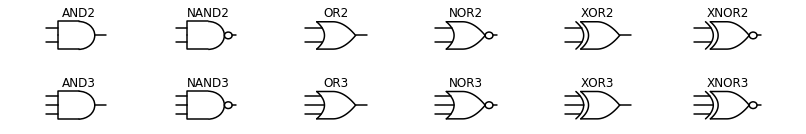

In [22]:
gates = [
l.AND2,
l.NAND2,
l.OR2,
l.NOR2,
l.XOR2,
l.XNOR2,
l.AND3,
l.NAND3,
l.OR3,
l.NOR3,
l.XOR3,
l.XNOR3,
]
drawElements(gates, n=6, dy=2.5, fname='gates.svg', lblloc='center', lblofst=.8)


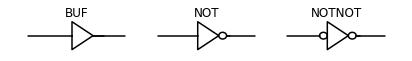

In [23]:
nots = [
l.BUF,
l.NOT,
l.NOTNOT
]
drawElements(nots, n=6, dy=2.5, fname='nots.svg', lblloc='center', lblofst=.8)


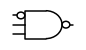

In [24]:
d = schem.Drawing()
d.add(l.andgate(inputs=3, nand=True, inputnots=[1]))
d.draw()
d.save('and_inputnot.svg')

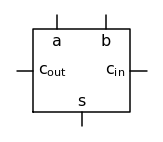

In [25]:
d = schem.Drawing()
tinputs = {'cnt':2, 'labels':['a','b']}
rinputs = {'cnt':1, 'labels':['$c_{in}$']}
linputs = {'cnt':1, 'labels':['$c_{out}$']}
binputs = {'cnt':1, 'labels':['$s$']}
B = e.blackbox(d.unit, d.unit, linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs)
FA = d.add(B)
d.draw()
d.save('fulladd_blackbox.svg')

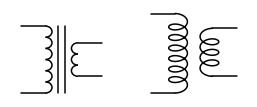

In [26]:
d = schem.Drawing()
x = d.add(e.transformer(6,3, core=True, loop=False))
d.add(e.LINE, xy=x.s1, l=d.unit/4)
d.add(e.LINE, xy=x.s2, l=d.unit/4)
d.add(e.LINE, xy=x.p1, l=d.unit/4, d='left')
d.add(e.LINE, xy=x.p2, l=d.unit/4, d='left')

x2 = d.add(e.transformer(6,3, core=False, loop=True), d='right', xy=(4,0))
d.add(e.LINE, xy=x2.s1, l=d.unit/4, d='right')
d.add(e.LINE, xy=x2.s2, l=d.unit/4, d='right')
d.add(e.LINE, xy=x2.p1, l=d.unit/4, d='left')
d.add(e.LINE, xy=x2.p2, l=d.unit/4, d='left')
d.draw()
d.save('transform.svg')

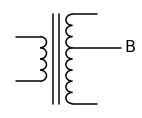

In [27]:
d = schem.Drawing()
xf = d.add( e.transformer(t1=4, t2=8, rtaps={'B':3}, loop=False ) )
d.add(e.LINE, xy=xf.s1, l=d.unit/4)
d.add(e.LINE, xy=xf.s2, l=d.unit/4)
d.add(e.LINE, xy=xf.p1, l=d.unit/4, d='left')
d.add(e.LINE, xy=xf.p2, l=d.unit/4, d='left')
d.add(e.LINE, xy=xf.B, l=d.unit/2, d='right', rgtlabel='B')
d.draw()
d.save('xform_tap.svg')

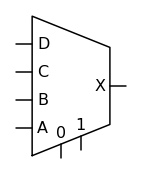

In [28]:
d = schem.Drawing()
M1 = d.add(e.mux(inputs=['A','B','C','D'], outputs=['X'], ctrls=['0','1']))
#d.add(e.mux(demux=True, h=3, w=2, inputs=['F'], outputs=['A','B'], topctrls=['C']), xy=M1.X, anchor='F')
d.draw()
d.save('mux.svg')

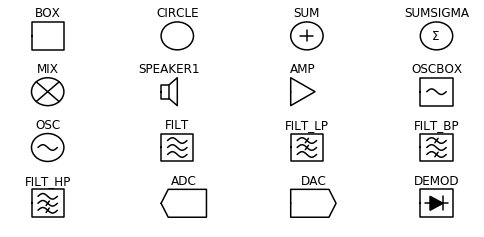

In [29]:
# DSP elements
from SchemDraw import dsp
dsp_elements = [
dsp.BOX,
dsp.CIRCLE,
dsp.SUM,
dsp.SUMSIGMA,
dsp.MIX,
dsp.SPEAKER1,
dsp.AMP,
dsp.OSCBOX,
dsp.OSC,
dsp.FILT,
dsp.FILT_LP,
dsp.FILT_BP,
dsp.FILT_HP,
dsp.ADC,
dsp.DAC,
dsp.DEMOD]

drawElements(dsp_elements, n=4, fname='dsp.svg', lblofst=.8, lblloc='center')

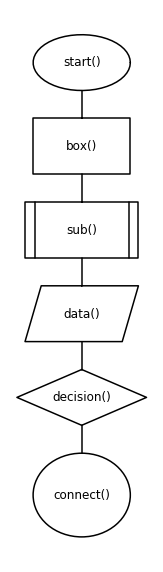

In [30]:
# Flowchart elements
from SchemDraw import flow
d = schem.Drawing(fontsize=12, unit=1)
d.add(flow.start(), label='start()')
d.add(e.LINE)
d.add(flow.box(), label='box()')
d.add(e.LINE)
d.add(flow.sub(), label='sub()')
d.add(e.LINE)
d.add(flow.data(), label='data()')
d.add(e.LINE)
d.add(flow.decision(), label='decision()')
d.add(e.LINE)
d.add(flow.connect(1.5), label='connect()')
d.draw()
d.save('flowcharts.svg')

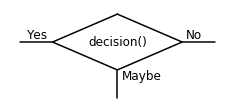

In [31]:
# How to label decision branches
d = schem.Drawing(fontsize=12, unit=1)
decision = d.add(flow.decision(responses={'W': 'Yes', 'E': 'No', 'S': 'Maybe'}), label='decision()')
d.add(e.LINE, xy=decision.W, d='left')
d.add(e.LINE, xy=decision.E, d='right')
d.add(e.LINE, xy=decision.S, d='down')
d.draw()
d.save('flowdecision.svg')

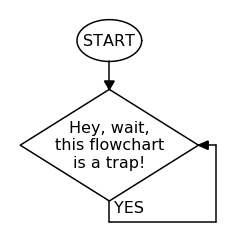

In [32]:
# https://xkcd.com/1195/
d = schem.Drawing()
d.add(flow.start(2, 1.5), label='START')
d.add(flow.LINE, d='down', l=d.unit/3)
d.add(flow.ARROWHEAD)
h = d.add(flow.decision(5.5, 4, responses={'S': 'YES'}), label='Hey, wait,\nthis flowchart\nis a trap!')
d.add(flow.LINE, d='down', l=d.unit/4)
d.add(flow.LINE, d='right', l=d.unit*1.1)
d.add(flow.LINE, d='up', toy=h.E)
d.add(flow.LINE, d='left', tox=h.E)
d.add(flow.ARROWHEAD)
d.draw()
d.save('xkcd1195.svg')

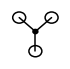

In [33]:
# Example for defining custom symbols
fclen = 0.5
FLUX_CAP = {
    'base': e.DOT,
    'paths': [[[0, 0], [0, -fclen*1.41]],  # Leg going down
              [[0, 0], [fclen, fclen]],    # Leg going up/right
              [[0, 0], [-fclen, fclen]]],  # Leg going up/left
    'shapes': [{'shape': 'circle', 'center': [0, -fclen*1.41], 'radius': .2, 'fill': False},
               {'shape': 'circle', 'center': [fclen, fclen], 'radius': .2, 'fill': False},
               {'shape': 'circle', 'center': [-fclen, fclen], 'radius': .2, 'fill': False}],
    'anchors': {'p1': [-fclen, fclen], 'p2': [fclen, fclen], 'p3': [0, -fclen]}}

d = schem.Drawing()
fc = d.add(FLUX_CAP)
d.draw()
d.save('fluxcap.svg')